In [30]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml
import pprint
sys.path.insert(1, '../../Databank/Scripts/BuildDatabank/')
from databankLibrary import lipids_dict, databank, molecules_dict
#from databankLibrary import download_link, lipids_dict, databank

#path = '../../Databank/Data/Simulations/'
path = '../Data/WATERdiffusion/'
db_data = databank(path)
systems = db_data.get_systems()

In [31]:
DvsHYD = []
Ds = []
Ts = []
HYD = []
DOI = []
FFSOL = []
FF = []
lipidfrac = {}
molfrac = {}
for lipid in lipids_dict:
    lipidfrac[lipid] = []
    
FracCharged = []

for molecule in molecules_dict:#, lipids_dict:
    #print(molecule)
    molfrac[molecule] = []

#for molecule in lipids_dict:
#    print(molecule)
#    molfrac[molecule] = []

    
#for subdir, dirs, files in os.walk(r'../../Data/WATERdiffusion/'):
#    for filename in files:
#        filepath = subdir + os.sep + filename
#        if filepath.endswith("README.yaml"):

for system in systems:
    subdir = system['path']
    READMEfilepath = subdir + '/README.yaml'
    #print(subdir)
    waterDIFFUSIONfilepath = subdir + '/WATERlateralMSD.xvg'
    
    if (not os.path.isfile(waterDIFFUSIONfilepath)):
        continue

    try:
        if 'CHARMM' not in system['FF']:
            continue
    except:
        continue

    #with open(READMEfilepath) as yaml_file:
    #    readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
               
    #Nlipids = 0
    #for lipid in lipids_dict:
    #    if np.sum(readme.get('N' + lipid)):
    #        Nlipids += np.sum(readme.get('N' + lipid))
    
    d = os.popen('grep D ' + waterDIFFUSIONfilepath + " | grep = | awk '{print $5}'").read()
    #if d:
    D = float(d) #float(os.popen('grep D ' + waterDIFFUSIONfilepath + " | grep = | awk '{print $5}'").read())
    #else:
    #    continue
    T = float(system['TEMPERATURE'])

    Nlipids = 0
    for molecule in system['COMPOSITION']:
        if molecule in lipids_dict:
            Nlipids += np.sum(system['COMPOSITION'][molecule]['COUNT'])
    
    NchargedLipids = 0
    for molecule in system['COMPOSITION']:
        if molecule in ['POPG', 'POPS']:
            NchargedLipids += np.sum(system['COMPOSITION'][molecule]['COUNT'])
    
    for lipid in lipids_dict:
        try:
            Nlipid = np.sum(system['COMPOSITION'][lipid]['COUNT'])
            lipidfrac[lipid].append(Nlipid / Nlipids)
            #print(lipid,Nlipid, Nlipids)
        except:
            lipidfrac[lipid].append(0)
            
            
        #if readme.get('N' + lipid):
        #    lipidfrac[lipid].append(np.sum(readme.get('N' + lipid)) / Nlipids)
        #else:
        #    lipidfrac[lipid].append(0)

    for molecule in molecules_dict:
        try:
            Nmolecule = np.sum(system['COMPOSITION'][molecule]['COUNT'])
            Nsol = system['COMPOSITION']['SOL']['COUNT']
            #if Nmolecule > 0:
            molfrac[molecule].append(Nmolecule / Nsol)
        except:
            molfrac[molecule].append(0)
            
    HYDlevel = system['COMPOSITION']['SOL']['COUNT']/Nlipids
        
    #print(T,D,HYDlevel)
    #if system['FF'] and 'CHARMM' in system['FF']:
    Ts.append(T)
    Ds.append(D)
    HYD.append(HYDlevel)
    FracCharged.append(NchargedLipids/Nlipids)
    DOI.append(system.get('DOI'))
    FFSOL.append(system.get('FFSOL'))
    FF.append(system.get('FF'))

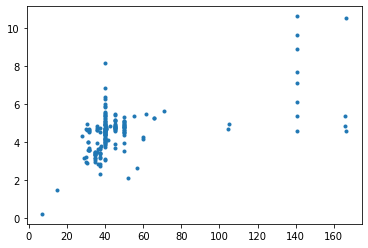

In [32]:
plt.plot(HYD,Ds,".")

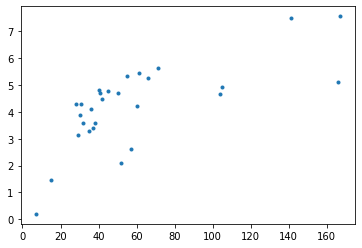

In [33]:
AveragedHYD = {}
sumHYD = {}
for i in range(len(HYD)):
    RoundedHYD = round(HYD[i])
    try:
        AveragedHYD[RoundedHYD] += Ds[i]
        sumHYD[RoundedHYD] += 1
    except:
        AveragedHYD[RoundedHYD] = Ds[i]
        sumHYD[RoundedHYD] = 1
    
for i in AveragedHYD:
    AveragedHYD[i] = AveragedHYD[i]/sumHYD[i]
    

AveragedHYD.keys()
#x, y = zip(AveragedHYD)
plt.plot(AveragedHYD.keys(),AveragedHYD.values(),".")

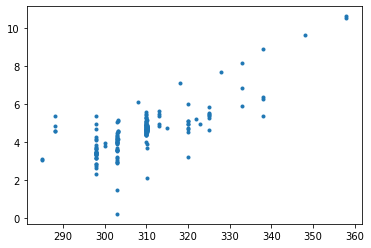

In [4]:
plt.plot(Ts,Ds,".")

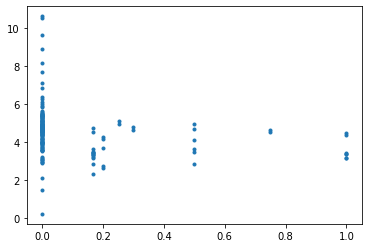

In [5]:
plt.plot(FracCharged,Ds,".")

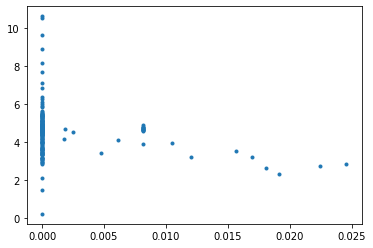

In [6]:
plt.plot(molfrac['CAL'],Ds,".")

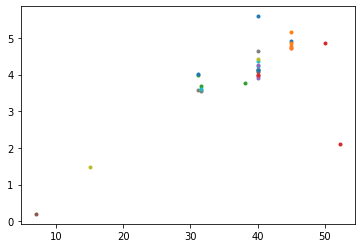

In [7]:
for i in range(len(HYD)):
    #print(lipidfrac['POPC'])
    #print(HYD[i],Ds[i],FFSOL[i],FF[i],DOI[i],molfrac['CAL'][i],molfrac['SOD'][i],lipidfrac['POPC'][i])
    if FF[i] and 'CHARMM' in FF[i] and lipidfrac['POPC'][i] == 1:
        if molfrac['CAL'][i] == 0 and molfrac['SOD'][i] == 0:
            #print(HYD[i],molfrac['NCAL'][i],lipidfrac['POPG'][i],Ds[i])
            #print(HYD[i],Ds[i],FFSOL[i],FF[i],DOI[i])
            plt.plot(HYD[i],Ds[i],".")

POPC -0.15781384647977223
POPG 0.11481333193148505
POPS -0.12940872717823967
POPE 0.6984211670593561
DMPC nan
DPPC 0.1419663689627058
DPPE nan
DPPG nan
DEPC nan
DLPC nan
DLIPC -1.0
DOPC 0.7968339546516969
DDOPC -1.0
DOPS nan
DSPC nan
DAPC 0.04314260518177944
POPI nan
SAPI nan
SLPI nan
CER -0.48377393817019937
CHOL 0.10224883038735279
DCHOL nan
DHMDMAB -0.9793627675629136


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invali

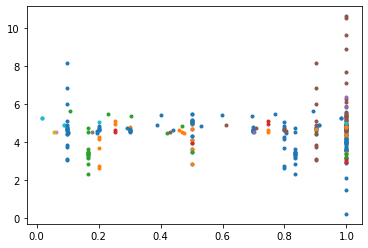

In [8]:
for lipid in lipids_dict:
    lipidFRACtmp = []
    DsTMP = []
    for i in range(len(Ds)):
        #print(lipidfrac[lipid][i],Ds[i])
        if lipidfrac[lipid][i] > 0:
            lipidFRACtmp.append(lipidfrac[lipid][i])
            DsTMP.append(Ds[i])
    #print(lipidFRACtmp,DsTMP)
    print(lipid,np.corrcoef(lipidFRACtmp,DsTMP)[0][1])
    plt.plot(lipidFRACtmp,DsTMP,".")

POT -0.457615241052298
SOD -0.5965473067593401
CLA -0.6705033130341468
CAL -0.7772153860442498


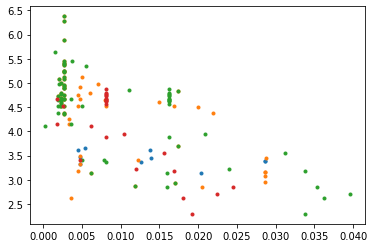

In [9]:
for molecule in molecules_dict:
    molFRACtmp = []
    DsTMP = []
    for i in range(len(Ds)):
        #print(lipidfrac[lipid][i],Ds[i])
        if molfrac[molecule][i] > 0:
            molFRACtmp.append(molfrac[molecule][i])
            DsTMP.append(Ds[i])
    #print(lipidFRACtmp,DsTMP)
    if molecule != 'SOL':
        print(molecule,np.corrcoef(molFRACtmp,DsTMP)[0][1])
        #print(molFRACtmp,DsTMP)
        plt.plot(molFRACtmp,DsTMP,".")

In [10]:
print(np.corrcoef(lipidfrac['CHOL'],Ds))

[[1.         0.09173478]
 [0.09173478 1.        ]]


In [214]:
lipidfrac['POPC']

[1.0,
 0.8,
 1.0,
 0.5,
 0.5,
 0.5,
 0.8333333333333334,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 0.0,
 0.6944444444444444,
 0.5,
 0.8064516129032258,
 0.7692307692307693,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 0.5319148936170213,
 1.0,
 0.8333333333333334,
 0.8928571428571429,
 1.0,
 0.0,
 1.0]

In [152]:
DsTMP

[[4.9253,
  2.7083,
  3.3532,
  4.3036,
  2.8559,
  3.4487,
  3.4009,
  4.1111,
  3.2152,
  4.1224,
  3.1398,
  1.4669,
  4.671,
  3.5732,
  4.5294,
  5.3511,
  3.6223,
  4.4873,
  5.4521,
  3.6084,
  0.2023,
  2.87,
  2.9331,
  4.8491,
  4.9509,
  4.4117,
  3.7809,
  3.3411,
  3.6622,
  3.9801,
  4.86,
  4.1329,
  2.2933,
  5.642,
  4.0635,
  3.154,
  4.0776],
 [4.9253,
  2.7083,
  3.3532,
  4.3036,
  2.8559,
  3.4487,
  3.4009,
  4.1111,
  3.2152,
  4.1224,
  3.1398,
  1.4669,
  4.671,
  3.5732,
  4.5294,
  5.3511,
  3.6223,
  4.4873,
  5.4521,
  3.6084,
  0.2023,
  2.87,
  2.9331,
  4.8491,
  4.9509,
  4.4117,
  3.7809,
  3.3411,
  3.6622,
  3.9801,
  4.86,
  4.1329,
  2.2933,
  5.642,
  4.0635,
  3.154,
  4.0776],
 [4.9253,
  2.7083,
  3.3532,
  4.3036,
  2.8559,
  3.4487,
  3.4009,
  4.1111,
  3.2152,
  4.1224,
  3.1398,
  1.4669,
  4.671,
  3.5732,
  4.5294,
  5.3511,
  3.6223,
  4.4873,
  5.4521,
  3.6084,
  0.2023,
  2.87,
  2.9331,
  4.8491,
  4.9509,
  4.4117,
  3.7809,
  3.3